In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.DataFrame(
[
    [6.82, 118, 0],
    [6.36, 125, 1],
    [5.39, 99, 1],
    [5.50, 106, 1],
    [6.39, 148, 0],
    [9.13, 148, 1],
    [7.17, 147, 1],
    [7.72, 72, 0]
], columns = ['cgpa',	'iq',	'is_placed'])
df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [3]:
df["pre1(log-odds)"] = np.log(5/3)
df

,cgpa,iq,is_placed,pre1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [6]:
df["pre1(prob)"] = 1/(1+np.exp(-df["pre1(log-odds)"]))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [10]:
df["res1"] = df["is_placed"] - df["pre1(prob)"]
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr1 = DecisionTreeRegressor(max_leaf_nodes=3,random_state=1)
dtr1.fit(df.iloc[:,0:2].values,df.iloc[:,-1].values)  

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.4, 0.8333333333333334, 'x[0] <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.6, 0.5, 'x[1] <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -0.625'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 0.042')]

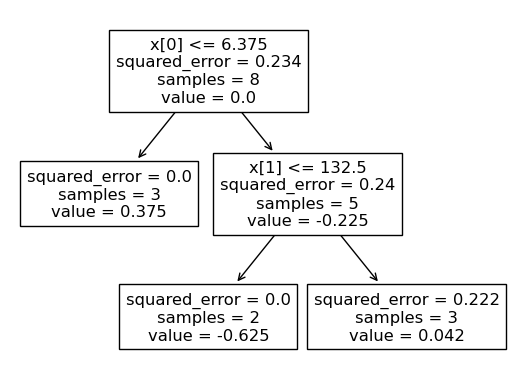

In [14]:
from sklearn.tree import plot_tree
plot_tree(dtr1)

In [17]:
df["leaf_entry"] = dtr1.apply(df.iloc[:,:2])
df

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [18]:
def return_logs(leaf):
    temp_df = df[df["leaf_entry"]==leaf]
    num = temp_df["res1"].sum()
    den = sum(temp_df["pre1(prob)"]*(1-temp_df["pre1(prob)"]))
    return round(num/den,2)

In [19]:
df["pre2(log-odds)"] = df["pre1(log-odds)"] + df["leaf_entry"].apply(return_logs)
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174


In [20]:
df["pre2(prob)"] = 1/(1+np.exp(-df["pre2(log-odds)"]))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds),pre2(prob)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [21]:
df["res2"] = df["is_placed"] - df["pre2(prob)"]
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds),pre2(prob),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


In [22]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=3,random_state=1)
dtr2.fit(df.iloc[:,0:2].values,df.iloc[:,-2].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.4, 0.8333333333333334, 'x[0] <= 6.605\nsquared_error = 0.095\nsamples = 8\nvalue = 0.61'),
 Text(0.2, 0.5, 'squared_error = 0.01\nsamples = 4\nvalue = 0.836'),
 Text(0.6, 0.5, 'x[1] <= 132.5\nsquared_error = 0.079\nsamples = 4\nvalue = 0.385'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 0.103'),
 Text(0.8, 0.16666666666666666, 'squared_error = -0.0\nsamples = 2\nvalue = 0.666')]

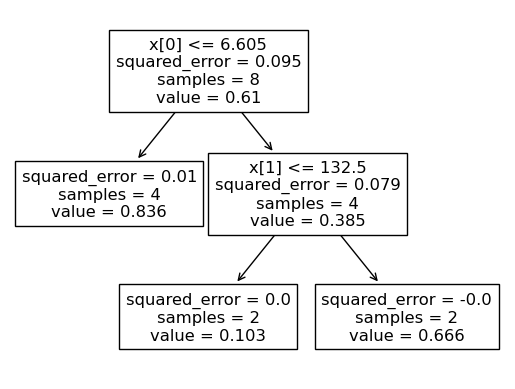

In [23]:
plot_tree(dtr2)

In [24]:
df["leaf_entry2"] = dtr2.apply(df.iloc[:,0:2])
df

c:\Users\HEET BHATT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds),pre2(prob),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,1
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3


In [25]:
def return_logs(leaf):
    temp_df = df[df["leaf_entry2"]==leaf]
    num = temp_df["res2"].sum()
    den = sum(temp_df["pre2(prob)"]*(1-temp_df["pre2(prob)"]))
    return round(num/den,2)

In [27]:
df["pre3(log_odds)"] = df["pre1(log-odds)"] + df["pre2(log-odds)"] + df["leaf_entry2"].apply(return_logs)
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds),pre2(prob),res2,leaf_entry2,pre3(log_odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,1,0.531651
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4,2.701651
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4,2.701651
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349


In [30]:
df["pre3(prob)"] = 1/(1+np.exp(-df["pre3(log_odds)"]))
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds),pre2(prob),res2,leaf_entry2,pre3(log_odds),pre3(prob)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349,0.059059
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651,0.875627
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651,0.875627
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651,0.875627
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,1,0.531651,0.629868
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4,2.701651,0.937124
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4,2.701651,0.937124
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349,0.059059


In [31]:
df["final_res"] = df["is_placed"] - df["pre3(prob)"]
df

,cgpa,iq,is_placed,pre1(log-odds),pre1(prob),res1,leaf_entry,pre2(log-odds),pre2(prob),res2,leaf_entry2,pre3(log_odds),pre3(prob),final_res
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349,0.059059,-0.059059
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651,0.875627,0.124373
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651,0.875627,0.124373
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,1,1.951651,0.875627,0.124373
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,1,0.531651,0.629868,-0.629868
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4,2.701651,0.937124,0.062876
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,4,2.701651,0.937124,0.062876
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-2.768349,0.059059,-0.059059
